In [44]:
# Anil Kumar Ravuru
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Final.csv')
df.head()

,name,description,message,fb_like,fb_angry,fb_thankful,fb_haha,fb_sad,fb_wow,fb_love,top_reaction_count,top_reaction,token_words,custom_token_words
0,This Korean Ad Hilariously Addresses The Power...,But how is this about the burger?,A proof that makeup and sorcery go hand in han...,1878,1,0,391,0,3,22,391,fb_haha,korean ad hilari address power makeup gag.tv,korean ad hilari address power makeup gag.tv
1,People Are Losing It For The Hiddle-Swift Split,Click to see the pic and write a comment...,My imaginary relationship with Tom Hiddleston ...,7606,5,0,1629,8,13,269,1629,fb_haha,peopl lose hiddl swift split,peopl lose hiddl swift split
2,"Sia Drops ""The Greatest"" Video Featuring 49 Da...",49 young dancers representing the 49 people lo...,Another amazing and breathtaking video from Si...,25304,6,0,95,44,367,2065,2065,fb_love,sia drop greatest video featur dancer pay trib...,sia drop greatest video featur dancer pay trib...
3,15 Tweets That Remind You Why You Need A Condo...,Click to see the pic and write a comment...,They also remind you how great your parents ar...,3452,2,0,607,0,1,62,607,fb_haha,tweet remind need condom readi,tweet remind need condom readi
4,Russian Topless Women Help Stop Speeding Drive...,Is it the breast idea ever?,"Not sure of if it will help, or cause more acc...",6454,12,0,1245,8,93,162,1245,fb_haha,russian topless woman help stop speed driver c...,russian topless woman help stop speed driver c...


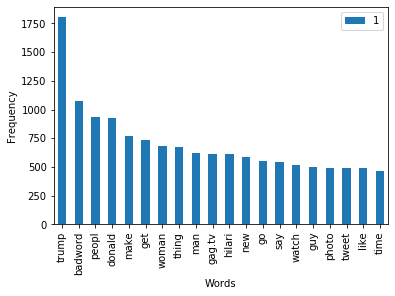

In [46]:
words = Counter(" ".join(df[df['top_reaction']=='fb_haha']["token_words"]).split()).most_common(20)
words_df = pd.DataFrame(words)
ax = words_df.plot(kind='bar',x=0,y=1)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.figure.savefig('haha.jpg')

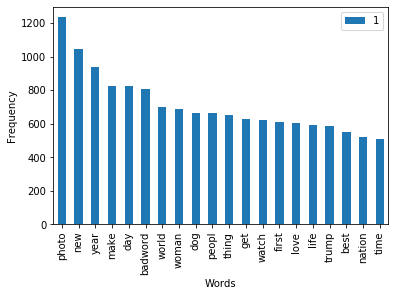

In [47]:
words = Counter(" ".join(df[df['top_reaction']=='fb_love']["token_words"]).split()).most_common(20)
words_df = pd.DataFrame(words)
ax = words_df.plot(kind='bar',x=0,y=1)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.figure.savefig('love.jpg')

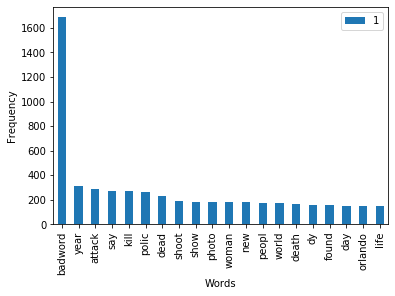

In [48]:
words = Counter(" ".join(df[df['top_reaction']=='fb_sad']["token_words"]).split()).most_common(20)
words_df = pd.DataFrame(words)
ax = words_df.plot(kind='bar',x=0,y=1)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.figure.savefig('sad.jpg')

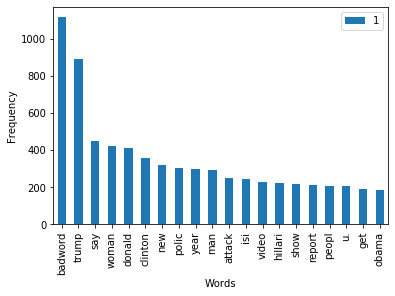

In [49]:
words = Counter(" ".join(df[df['top_reaction']=='fb_angry']["token_words"]).split()).most_common(20)
words_df = pd.DataFrame(words)
ax = words_df.plot(kind='bar',x=0,y=1)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.figure.savefig('angry.jpg')

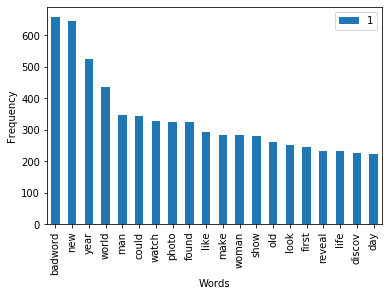

In [50]:
words = Counter(" ".join(df[df['top_reaction']=='fb_wow']["token_words"]).split()).most_common(20)
words_df = pd.DataFrame(words)
ax = words_df.plot(kind='bar',x=0,y=1)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.figure.savefig('wow.jpg')

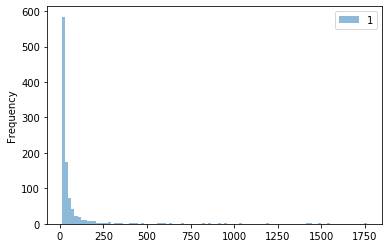

In [7]:
words = Counter(" ".join(df[df['top_reaction']=='fb_wow']["name"]).split()).most_common(1000)
words_df = pd.DataFrame(words)
words_df
words_df.plot.hist(bins=100, alpha=0.5)





In [8]:
def is_smiley(row):
    return ':)' in row
xdf = df[df['name'].apply(lambda row: is_smiley(row))]
print(xdf.count())
xdf

name                  1
description           1
message               1
fb_like               1
fb_angry              1
fb_thankful           1
fb_haha               1
fb_sad                1
fb_wow                1
fb_love               1
top_reaction_count    1
top_reaction          1
token_words           1
custom_token_words    1
dtype: int64


,name,description,message,fb_like,fb_angry,fb_thankful,fb_haha,fb_sad,fb_wow,fb_love,top_reaction_count,top_reaction,token_words,custom_token_words
1903,@9gag on Instagram: “Tag your beloved one to s...,“Tag your beloved one to show them your love :...,Love is the cutest and most powerful thing on ...,83513,25,0,382,98,68,3904,3904,fb_love,gag instagram tag belov one show love gag gagm...,gag instagram tag belov one show love gag gagm...


Text(0, 0.5, 'Frequency')

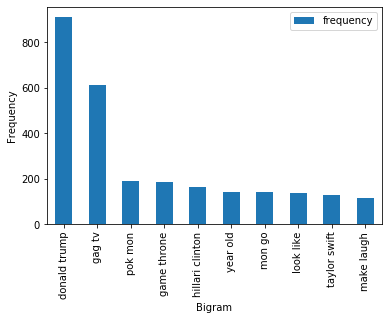

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['top_reaction']=='fb_haha']["custom_token_words"])
frequencies = sum(sparse_matrix).toarray()[0]
bdf = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
test = bdf.sort_values(['frequency'], ascending=[False]).head(10)
test['bigram'] = test.index
ax = test.plot(kind='bar',x='bigram',y='frequency')
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

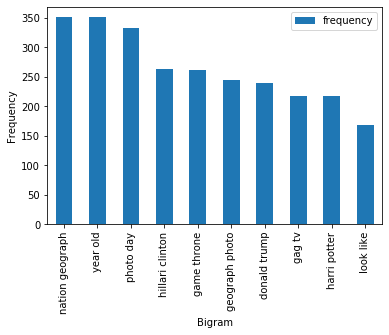

In [32]:
sparse_matrix = word_vectorizer.fit_transform(df[df['top_reaction']=='fb_love']["custom_token_words"])
frequencies = sum(sparse_matrix).toarray()[0]
bdf = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
test = bdf.sort_values(['frequency'], ascending=[False]).head(10)
test['bigram'] = test.index
ax = test.plot(kind='bar',x='bigram',y='frequency')
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

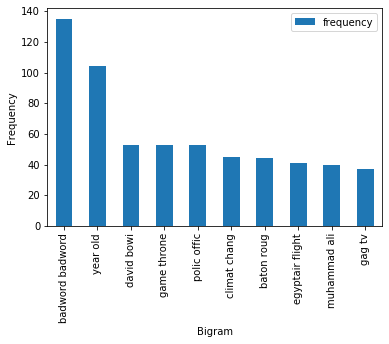

In [33]:
sparse_matrix = word_vectorizer.fit_transform(df[df['top_reaction']=='fb_sad']["custom_token_words"])
frequencies = sum(sparse_matrix).toarray()[0]
bdf = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
test = bdf.sort_values(['frequency'], ascending=[False]).head(10)
test['bigram'] = test.index
ax = test.plot(kind='bar',x='bigram',y='frequency')
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

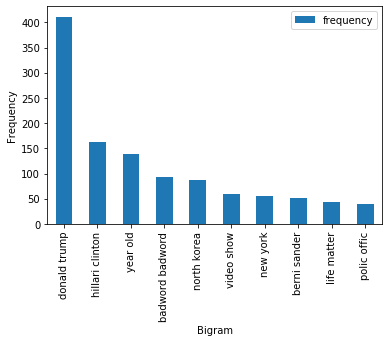

In [34]:
sparse_matrix = word_vectorizer.fit_transform(df[df['top_reaction']=='fb_angry']["custom_token_words"])
frequencies = sum(sparse_matrix).toarray()[0]
bdf = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
test = bdf.sort_values(['frequency'], ascending=[False]).head(10)
test['bigram'] = test.index
ax = test.plot(kind='bar',x='bigram',y='frequency')
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

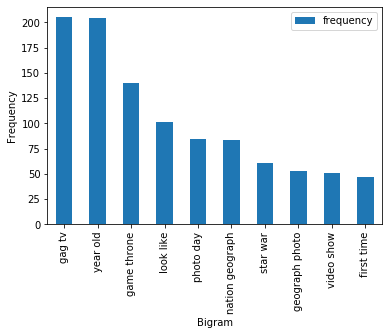

In [35]:
sparse_matrix = word_vectorizer.fit_transform(df[df['top_reaction']=='fb_wow']["custom_token_words"])
frequencies = sum(sparse_matrix).toarray()[0]
bdf = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
test = bdf.sort_values(['frequency'], ascending=[False]).head(10)
test['bigram'] = test.index
ax = test.plot(kind='bar',x='bigram',y='frequency')
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")

In [39]:
df[df['top_reaction']=='fb_love']['name'].count()

23615

In [40]:
df[df['top_reaction']=='fb_haha']['name'].count()

18652

In [41]:
df[df['top_reaction']=='fb_wow']['name'].count()

11575

In [42]:
df[df['top_reaction']=='fb_angry']['name'].count()

8359

In [43]:
df[df['top_reaction']=='fb_sad']['name'].count()

7316